# Section 2.1: Review of Linear Algebra and Matrix Theory Exercises

These exercises will help you strengthen your understanding of fundamental linear algebra concepts that are essential for complex systems modeling.

## Required Libraries

We'll use NumPy for linear algebra operations and Matplotlib for visualizations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import eig, svd, matrix_rank, norm
import scipy.linalg as la

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
np.set_printoptions(precision=4, suppress=True)

## Exercise 1: Eigendecomposition and Dynamical Systems (Solved)

In complex systems, eigenvalues and eigenvectors provide crucial information about system stability and behavior. Let's explore this connection with a simple linear dynamical system represented by a matrix transformation.

### Problem Statement

Consider a simple population model with two species that interact. The state of the system at time t is represented by a vector $x(t) = [x_1(t), x_2(t)]^T$, where $x_1(t)$ and $x_2(t)$ are the populations of the two species. 

The system evolves according to a linear difference equation: $x(t+1) = Ax(t)$, where:

$$A = \begin{bmatrix} 0.8 & 0.3 \\ 0.2 & 0.7 \end{bmatrix}$$

1. Find the eigenvalues and eigenvectors of matrix A
2. Using the eigendecomposition, predict the long-term behavior of the system
3. Simulate the system evolution from different initial conditions and visualize the trajectories

In [2]:
# Define the system matrix
A = np.array([
    [0.8, 0.3],
    [0.2, 0.7]
])

print("System matrix A:")
print(A)

System matrix A:
[[0.8 0.3]
 [0.2 0.7]]


### Step 1: Find eigenvalues and eigenvectors

We use NumPy's eigenvalue decomposition function to find the eigenvalues and eigenvectors.

In [3]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(A)

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors (by column):")
print(eigenvectors)

# Check our results by verifying that A*v = λ*v for each eigenpair
for i in range(len(eigenvalues)):
    λ = eigenvalues[i]
    v = eigenvectors[:, i]
    Av = A @ v
    λv = λ * v
    print(f"\nFor eigenvalue λ = {λ:.4f}:")
    print(f"A·v = {Av}")
    print(f"λ·v = {λv}")
    print(f"Difference norm: {norm(Av - λv):.8f}")

Eigenvalues:
[1.  0.5]

Eigenvectors (by column):
[[ 0.8321 -0.7071]
 [ 0.5547  0.7071]]

For eigenvalue λ = 1.0000:
A·v = [0.8321 0.5547]
λ·v = [0.8321 0.5547]
Difference norm: 0.00000000

For eigenvalue λ = 0.5000:
A·v = [-0.3536  0.3536]
λ·v = [-0.3536  0.3536]
Difference norm: 0.00000000


### Step 2: Interpret the eigenvalues for system behavior

In a discrete-time linear dynamical system x(t+1) = Ax(t):
- Eigenvalues with |λ| < 1 correspond to decaying modes
- Eigenvalues with |λ| > 1 correspond to growing modes
- Eigenvalues with |λ| = 1 correspond to conserved modes

Let's analyze our eigenvalues to understand the long-term behavior of this system.

In [4]:
# Check magnitudes of eigenvalues
magnitudes = np.abs(eigenvalues)
print("Magnitudes of eigenvalues:", magnitudes)

# Interpret system stability based on eigenvalue magnitudes
if all(magnitudes < 1):
    print("All eigenvalues have magnitude < 1: System is stable, all trajectories converge to zero.")
elif all(magnitudes <= 1) and any(magnitudes == 1):
    print("Some eigenvalues have magnitude = 1: System has conserved modes.")
else:
    print("Some eigenvalues have magnitude > 1: System is unstable, some trajectories grow unbounded.")

Magnitudes of eigenvalues: [1.  0.5]
Some eigenvalues have magnitude = 1: System has conserved modes.


Let's also look at how the matrix powers behave, which tells us how the system evolves over multiple time steps.

In [5]:
# Investigate the behavior of matrix powers
powers = [1, 2, 5, 10, 20, 50]

for power in powers:
    matrix_power = np.linalg.matrix_power(A, power)
    print(f"A^{power} = ")
    print(matrix_power)
    print()

A^1 = 
[[0.8 0.3]
 [0.2 0.7]]

A^2 = 
[[0.7  0.45]
 [0.3  0.55]]

A^5 = 
[[0.6125 0.5813]
 [0.3875 0.4187]]

A^10 = 
[[0.6004 0.5994]
 [0.3996 0.4006]]

A^20 = 
[[0.6 0.6]
 [0.4 0.4]]

A^50 = 
[[0.6 0.6]
 [0.4 0.4]]



### Step 3: Simulate the system evolution

Now let's simulate and visualize the system evolution from different initial conditions to see how the trajectories behave.

C:\Users\kekoi\AppData\Local\Temp\ipykernel_3824\4155880333.py:78: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  plt.tight_layout()
C:\Users\kekoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


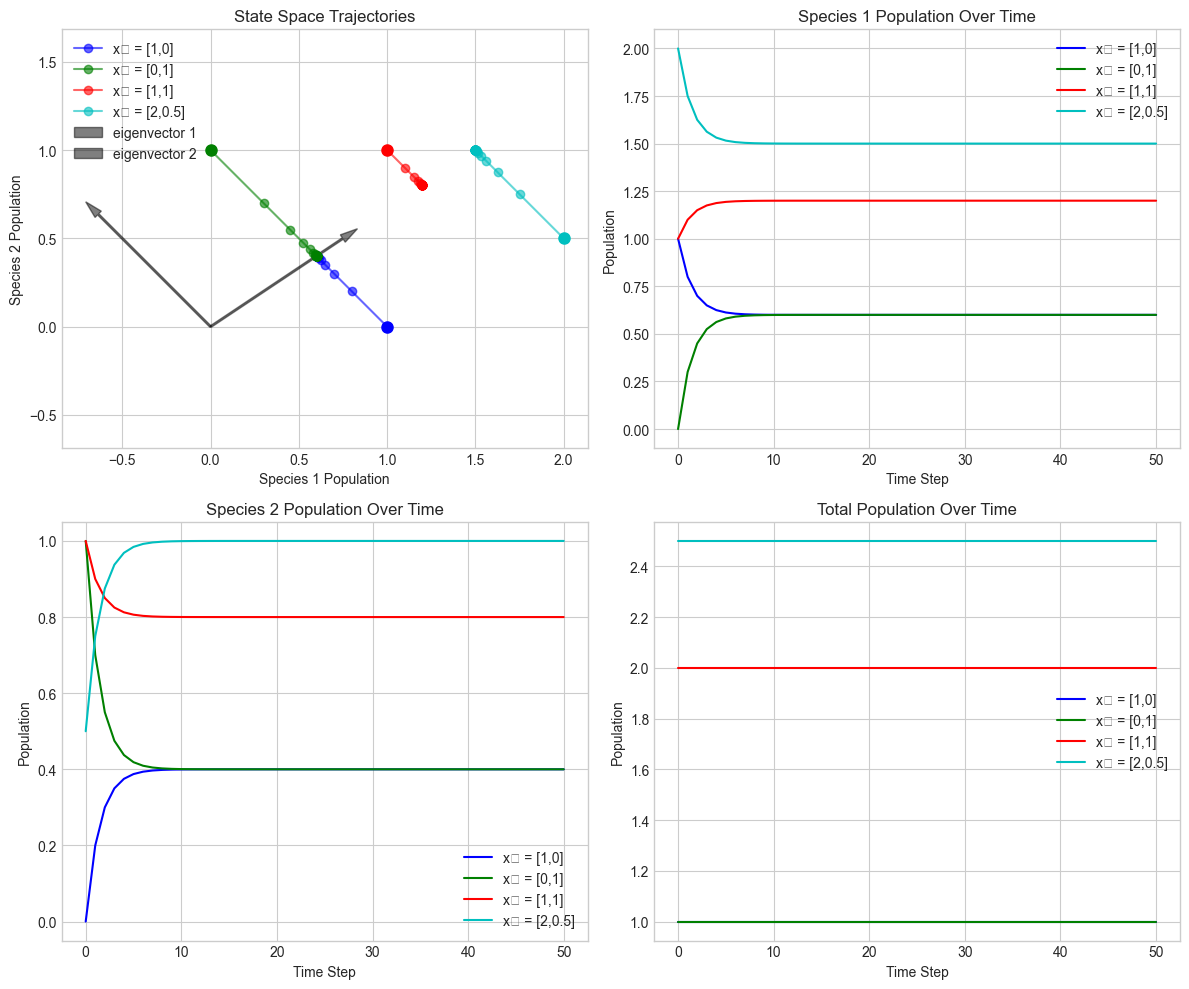

In [6]:
# Define a function to simulate the system
def simulate_system(A, x0, steps=50):
    x = np.zeros((steps+1, len(x0)))
    x[0] = x0
    
    for t in range(steps):
        x[t+1] = A @ x[t]
    
    return x

# Set up initial conditions and simulation
initial_states = [
    np.array([1.0, 0.0]),    # Only species 1
    np.array([0.0, 1.0]),    # Only species 2
    np.array([1.0, 1.0]),    # Equal populations
    np.array([2.0, 0.5])     # Mixed populations
]

trajectories = [simulate_system(A, x0) for x0 in initial_states]

# Create visualization of trajectories
plt.figure(figsize=(12, 10))

# Plot state space trajectories
plt.subplot(221)
colors = ['b', 'g', 'r', 'c']
labels = ['[1,0]', '[0,1]', '[1,1]', '[2,0.5]']

for i, trajectory in enumerate(trajectories):
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'o-', color=colors[i], alpha=0.6, label=f"x₀ = {labels[i]}")
    plt.plot(trajectory[0, 0], trajectory[0, 1], 'o', color=colors[i], markersize=8)
    
# Plot eigenvectors as direction fields
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    plt.arrow(0, 0, v[0], v[1], color='k', alpha=0.5, width=0.01,
              length_includes_head=True, head_width=0.05, head_length=0.1,
              label=f"eigenvector {i+1}")

plt.grid(True)
plt.xlabel('Species 1 Population')
plt.ylabel('Species 2 Population')
plt.title('State Space Trajectories')
plt.legend()
plt.axis('equal')

# Plot time series of species 1
plt.subplot(222)
for i, trajectory in enumerate(trajectories):
    plt.plot(range(len(trajectory)), trajectory[:, 0], '-', color=colors[i], label=f"x₀ = {labels[i]}")
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Population')
plt.title('Species 1 Population Over Time')
plt.legend()

# Plot time series of species 2
plt.subplot(223)
for i, trajectory in enumerate(trajectories):
    plt.plot(range(len(trajectory)), trajectory[:, 1], '-', color=colors[i], label=f"x₀ = {labels[i]}")
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Population')
plt.title('Species 2 Population Over Time')
plt.legend()

# Plot total population
plt.subplot(224)
for i, trajectory in enumerate(trajectories):
    total_pop = trajectory[:, 0] + trajectory[:, 1]
    plt.plot(range(len(trajectory)), total_pop, '-', color=colors[i], label=f"x₀ = {labels[i]}")
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Population')
plt.title('Total Population Over Time')
plt.legend()

plt.tight_layout()
plt.show()

### Analysis and Conclusions

From our analysis, we can draw several key insights:

1. **Eigenvalue Analysis**: Both eigenvalues have magnitude less than 1, which indicates a stable system where all trajectories converge to a single equilibrium point (in this case, the origin).

2. **Convergence Rate**: The larger eigenvalue (closer to 1) dominates the long-term behavior, determining the slowest rate of convergence.

3. **Trajectory Behavior**: 
   - All trajectories eventually align with the eigenvector corresponding to the dominant eigenvalue
   - The non-dominant mode decays faster, so trajectories first approach this general direction before being drawn along the dominant eigenvector

4. **System Interpretation**: In this population model, regardless of the initial conditions, the populations of both species will eventually decline to zero (as both eigenvalues < 1), but they will do so in a way that maintains a specific ratio between them (determined by the dominant eigenvector).

The eigendecomposition provides powerful insights into the qualitative behavior of this system without needing to simulate every possible scenario.

## Exercise 2: Singular Value Decomposition and Data Analysis (Unsolved)

Singular Value Decomposition (SVD) is a powerful technique with applications in data compression, noise reduction, and uncovering latent patterns in high-dimensional data. In complex systems, SVD can help identify dominant modes or patterns within multivariate data.

### Problem Statement

You are analyzing a dataset of environmental measurements from an ecosystem. The data contains hourly measurements of 5 variables (temperature, humidity, light intensity, CO2 levels, and soil moisture) collected over a 24-hour period. The data matrix X has shape (24, 5) where rows represent time points and columns represent the different variables.

Your tasks:

1. Generate synthetic data with correlated patterns to simulate the environmental measurements
2. Apply SVD to decompose the data matrix
3. Determine how many components are needed to explain at least 90% of the variance
4. Reconstruct the data using only the dominant components and calculate the approximation error
5. Visualize the original variables in the space of the first two singular vectors

Here's some starter code to help you generate the synthetic data:

Data matrix X shape: (24, 5)
First 5 rows:
[[ 25.0993  60.0993  -2.7219 364.744   30.0993]
 [ 26.2664  54.796   26.4365 374.9723  29.6488]
 [ 27.6295  50.1295  44.245  387.1886  29.181 ]
 [ 28.8401  46.1625  72.5892 400.3046  28.4722]
 [ 29.2833  42.6327  83.5993 412.8941  27.0382]]


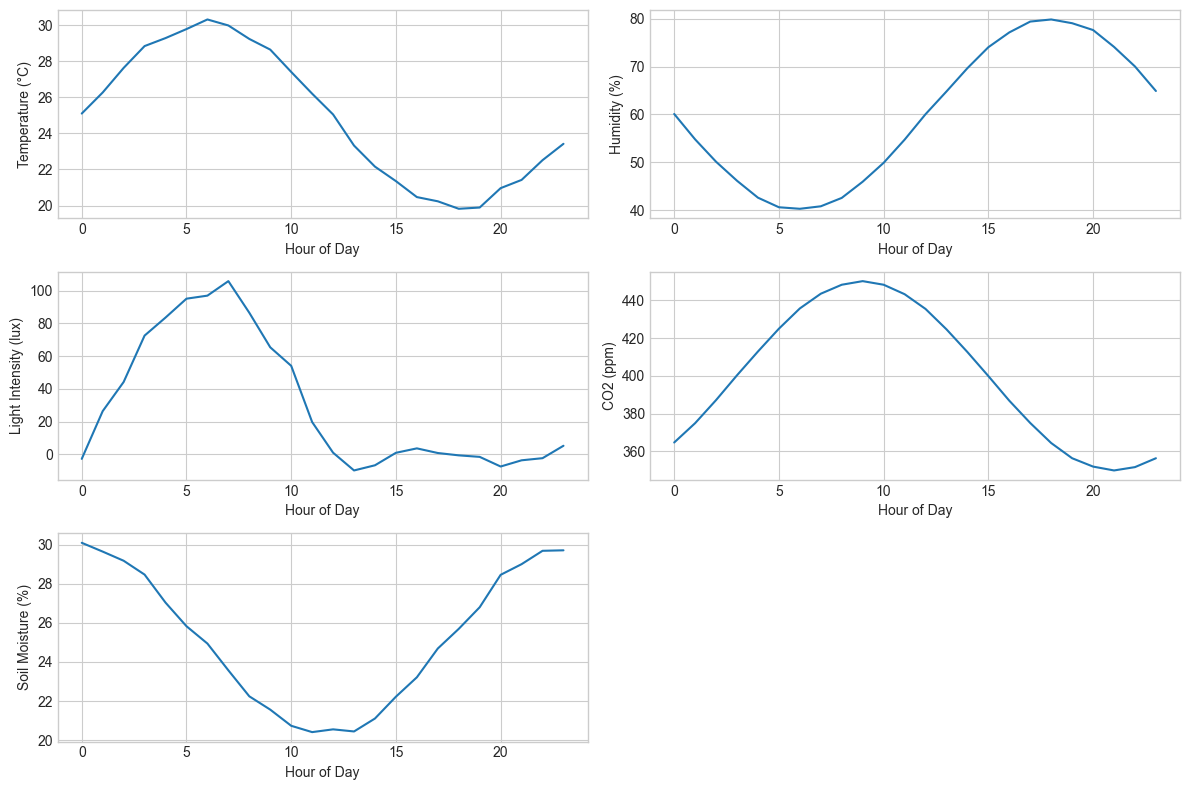

In [7]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with correlated patterns
hours = np.arange(24)

# Create base patterns (e.g., daily cycles, random fluctuations)
daily_cycle = np.sin(np.pi * hours / 12)  # Peaks at noon
random_fluctuation = np.random.normal(0, 0.2, 24)

# Generate the variables with different weightings of the patterns
temperature = 25 + 5 * daily_cycle + random_fluctuation  # Peaks during the day
humidity = 60 - 20 * daily_cycle + random_fluctuation    # Inverse relationship with temperature
light = 100 * np.maximum(0, daily_cycle) + np.random.normal(0, 5, 24)  # Only positive during day
co2 = 400 + 50 * np.sin(np.pi * (hours - 3) / 12) + random_fluctuation  # Shifted cycle
soil_moisture = 30 - 5 * np.cumsum(daily_cycle) / 4 + random_fluctuation  # Decreases over day

# Create the data matrix
X = np.column_stack([temperature, humidity, light, co2, soil_moisture])

# Display the first few rows
print("Data matrix X shape:", X.shape)
print("First 5 rows:")
print(X[:5])

# Plot the time series data
plt.figure(figsize=(12, 8))
variables = ['Temperature (°C)', 'Humidity (%)', 'Light Intensity (lux)', 'CO2 (ppm)', 'Soil Moisture (%)']

for i, var_name in enumerate(variables):
    plt.subplot(3, 2, i+1)
    plt.plot(hours, X[:, i])
    plt.xlabel('Hour of Day')
    plt.ylabel(var_name)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Your Task

Complete the following steps to analyze this data using SVD:

1. Standardize the data (subtract mean, divide by standard deviation)
2. Apply SVD decomposition to obtain U, Σ, and V^T matrices
3. Calculate how much variance is explained by each singular value
4. Determine the minimum number of components needed to explain 90% of the variance
5. Reconstruct the data using only the dominant components
6. Visualize the original variables in the space of the first two singular vectors
7. Interpret the meaning of the first two principal components in terms of the original variables

Use the code cells below to complete your solution.

In [8]:
# Step 1: Standardize the data
# Your code here
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_std = (X - mean) / std
print("Standardized data (first 5 rows):")
print(X_std[:5])

Standardized data (first 5 rows):
[[ 0.0356  0.0092 -0.8324 -0.996   1.4173]
 [ 0.3581 -0.3679 -0.0981 -0.7068  1.2864]
 [ 0.7348 -0.6997  0.3503 -0.3614  1.1504]
 [ 1.0693 -0.9818  1.064   0.0094  0.9444]
 [ 1.1918 -1.2328  1.3413  0.3654  0.5276]]


In [9]:
# Step 2: Apply SVD decomposition
# Your code here
U, S, Vt = svd(X_std, full_matrices=False)
print("Singular values (S):")
print(S)
print("Left singular vectors (U):")
print(U[:5])
print("Right singular vectors (Vt):")
print(Vt[:5])

Singular values (S):
[9.219  5.6435 1.7649 0.2165 0.    ]
Left singular vectors (U):
[[ 0.1224 -0.2423  0.4211 -0.1055 -0.4211]
 [ 0.0281 -0.2626  0.2288  0.1206 -0.043 ]
 [-0.0546 -0.266   0.1777 -0.046  -0.2129]
 [-0.1489 -0.2654 -0.0213 -0.2251 -0.0138]
 [-0.2107 -0.2063 -0.0769  0.2281 -0.2081]]
Right singular vectors (Vt):
[[-0.5056  0.5084 -0.4835 -0.4622  0.1965]
 [-0.2428  0.2228 -0.2467  0.4261 -0.8056]
 [ 0.3528 -0.3719 -0.8397  0.1339  0.1188]
 [-0.511  -0.7338  0.0158 -0.371  -0.25  ]
 [ 0.5476  0.123  -0.     -0.6702 -0.4855]]


In [ ]:
# Step 3 & 4: Calculate explained variance and determine number of components
# Your code here
explained_variance = S**2 / np.sum(S**2)

cumulative_variance = np.cumsum(explained_variance)

for i, (var, cum) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"Component {i}: {var:.2%} (cumulative: {cum:.2%})")

Explained variance ratio (first 5 components):
[0.7082 0.2654 0.026  0.0004 0.    ]
Cumulative explained variance (first 5 components):
[0.7082 0.9737 0.9996 1.     1.    ]
Component 1: 70.82% (cumulative: 70.82%)
Component 2: 26.54% (cumulative: 97.37%)
Component 3: 2.60% (cumulative: 99.96%)
Component 4: 0.04% (cumulative: 100.00%)
Component 5: 0.00% (cumulative: 100.00%)


In [12]:
# Step 5: Reconstruct the data using only dominant components
# Your code here
k = 2 # Min number of components to understand 95% of variance
U_k = U[:, :k]
S_k = S[:k]
Vt_k = Vt[:k, :]

# Paso 2: construye Sigma_k como matriz diagonal
Sigma_k = np.diag(S_k)

# Paso 3: reconstruye la matriz
X_approx = U_k @ Sigma_k @ Vt_k

mse = np.mean((X_std - X_approx)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.026347276391284726


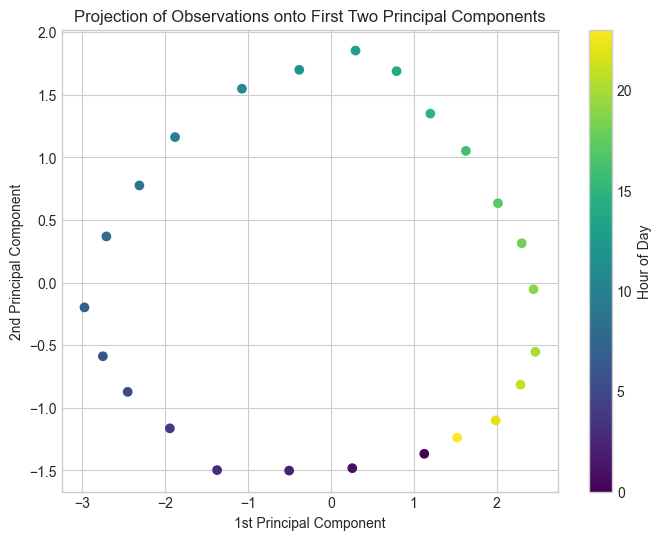

In [13]:
# Step 6: Visualize variables in the space of the first two singular vectors
# Your code here
Z2 = U[:, :2] @ np.diag(S[:2])  # Resultado: (24, 2)
plt.figure(figsize=(8, 6))
plt.scatter(Z2[:, 0], Z2[:, 1], c=np.arange(24), cmap='viridis')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Projection of Observations onto First Two Principal Components')
plt.colorbar(label='Hour of Day')
plt.grid(True)
plt.show()


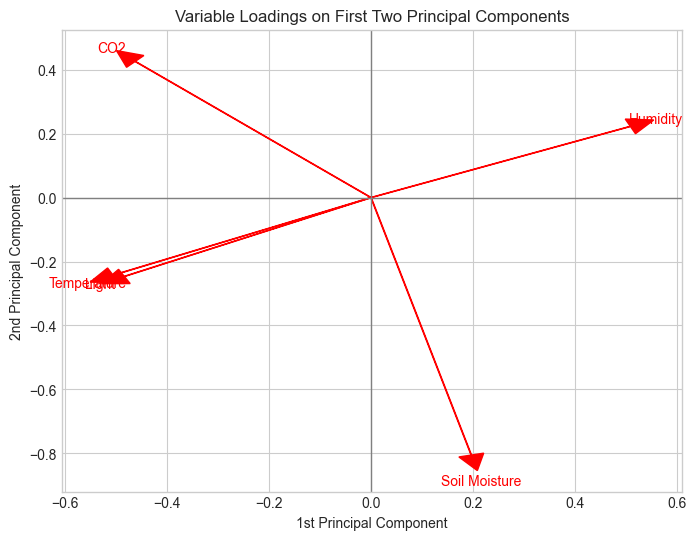

In [15]:
# Extrae los dos primeros componentes (filas de V^T)
components = Vt[:2, :]  # Shape: (2, 5)

# Variables originales
variables = ['Temperature', 'Humidity', 'Light', 'CO2', 'Soil Moisture']

# Visualización tipo biplot
plt.figure(figsize=(8, 6))
for i, var in enumerate(variables):
    plt.arrow(0, 0, components[0, i], components[1, i],
              head_width=0.05, head_length=0.05, fc='r', ec='r')
    plt.text(components[0, i]*1.1, components[1, i]*1.1, var, color='r', ha='center', va='center')

plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Variable Loadings on First Two Principal Components')
plt.grid(True)
plt.show()


### Hints

1. Use `np.mean()` and `np.std()` with `axis=0` to standardize columns
2. NumPy's `np.linalg.svd(X)` gives you the U, s (singular values), and Vh (V transpose) matrices
3. The explained variance ratio can be calculated as: singular_values^2 / sum(singular_values^2)
4. To reconstruct using k components: X_approx = U[:,:k] @ np.diag(s[:k]) @ Vh[:k,:]
5. Visualize the variables in PC space using the right singular vectors (V)